### SoVI_Peru_Caculation
#### This script calculates SoVI for Peru


Donghoon Lee, Nov-3-2019

In [1]:
import os
import numpy as np
import pandas as pd
import geopandas as gpd
import gdal
import rasterio
import fhvuln as fhv
from spss_pca_dl import SPSS_PCA

### Load datasets

In [8]:
indata = pd.read_hdf('./data/inputdata_peru.hdf')
indata_name = pd.read_hdf('./data/inputdata_peru_table.hdf')
indata_name

,Name,Sign,Type,Description
0,PAGE5,pos,person,Children under 5 years (%)
1,PAGE65,pos,person,Elder population (65+ years) (%)
2,PFEMALE,pos,person,Percent females
3,PDISABL,pos,person,Percent population with disability
4,PMEDINS,neg,person,Percent population with health insurance
5,PNOSWALL,pos,house,Percent households without strong walls
6,PNOWATER,pos,house,Percent households without public water supply
7,PNOELEC,pos,house,Percent households without electricity
8,PNOSEWAGE,pos,house,Percent households without sewage infrastructure
9,PLITERACY,pos,person,Percent population who cannot read and write


### SoVI caculation

In [3]:
pca = SPSS_PCA(indata, reduce=True, varimax=True)

In [10]:
sovi_peru = pca.scores_rot.sum(1)
sovi_peru = pd.DataFrame(sovi_peru, index=indata.index, columns=['sovi'])
attrib_contribution = pca.weights_rot.sum(1)
print('Mean: %.3f\nMax: %.3f\nMin: %.3f' % (sovi_peru.mean(), sovi_peru.max(), sovi_peru.min()))
print(attrib_contribution[:,None])
dl_stype = np.dot(pca.weights_rot,pca.eigenvals[:,None])
print(dl_stype)

Mean: 0.000
Max: 6.952
Min: -6.758
[[ 0.31298509]
 [-0.25260141]
 [-0.04134773]
 [-0.2237688 ]
 [-0.09388598]
 [ 0.22254948]
 [ 0.1976372 ]
 [ 0.20885664]
 [ 0.21112176]
 [ 0.19382259]
 [ 0.18951117]
 [ 0.1903221 ]
 [-0.14056831]
 [ 0.22333434]
 [ 0.16156088]
 [ 0.15069151]]
[[ 0.76591791]
 [-0.27042443]
 [ 0.35411947]
 [-0.3845321 ]
 [-0.8460189 ]
 [ 0.41995301]
 [ 0.26451805]
 [ 0.51050518]
 [ 0.73258768]
 [ 1.17449724]
 [ 1.1646005 ]
 [ 0.88290701]
 [-0.79572357]
 [ 0.46531084]
 [ 0.70753961]
 [ 0.79674682]]


### Mapping

In [51]:
# Merge sovi scores to geodataframe
gdf = gpd.read_file('./data/DISTRITOS.shp')
gdf = gdf.drop(['AREA','FUENTE','CODCCPP'], axis=1)
gdf.IDDIST = pd.to_numeric(gdf.IDDIST)
gdf = gdf.merge(sovi_peru, on='IDDIST', how='left')
if False:
    fn = './data/sovi_caculated.shp'
    gdf.to_file(fn)
    print('%s is saved.' % fn)

./data/sovi_caculated.shp is saved.


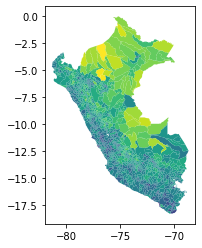

In [46]:
# Mapping
import seaborn as sns
import matplotlib.pyplot as plt





# gdf.plot(column='sovi')